Mounted at /content/drive
1/1 [==============================] - 0s 68ms/step
Training Bernoulli Naive Bayes...
Performance metrics for Bernoulli Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.20      1.00      0.34        60
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        60
           4       0.25      0.02      0.03        60

    accuracy                           0.20       300
   macro avg       0.09      0.20      0.07       300
weighted avg       0.09      0.20      0.07       300

Accuracy: 0.20333333333333334
Sensitivity: 0.2033333333333333
Precision: 0.09054054054054055
F1 Score: 0.07366573033707866



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

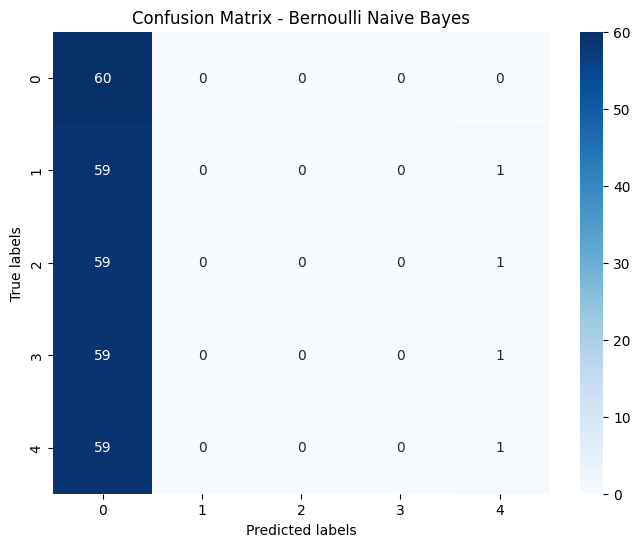

Training Multinomial Naive Bayes...
Performance metrics for Multinomial Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.52      0.57        60
           1       0.47      0.75      0.58        60
           2       0.25      0.15      0.19        60
           3       0.65      0.78      0.71        60
           4       0.79      0.63      0.70        60

    accuracy                           0.57       300
   macro avg       0.56      0.57      0.55       300
weighted avg       0.56      0.57      0.55       300

Accuracy: 0.5666666666666667
Sensitivity: 0.5666666666666667
Precision: 0.56015634323905
F1 Score: 0.5505554833129559



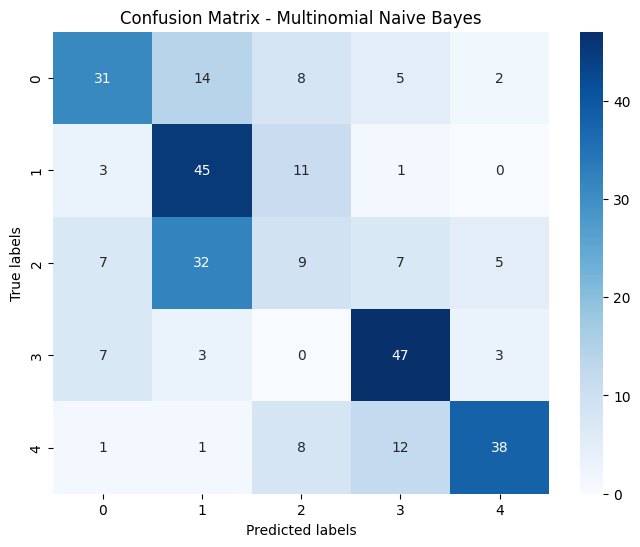

Training Complement Naive Bayes...
Performance metrics for Complement Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.38      0.49        60
           1       0.43      0.93      0.59        60
           2       0.00      0.00      0.00        60
           3       0.59      0.83      0.69        60
           4       0.75      0.65      0.70        60

    accuracy                           0.56       300
   macro avg       0.49      0.56      0.49       300
weighted avg       0.49      0.56      0.49       300

Accuracy: 0.56
Sensitivity: 0.5599999999999999
Precision: 0.493194844371315
F1 Score: 0.49403621679337395



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

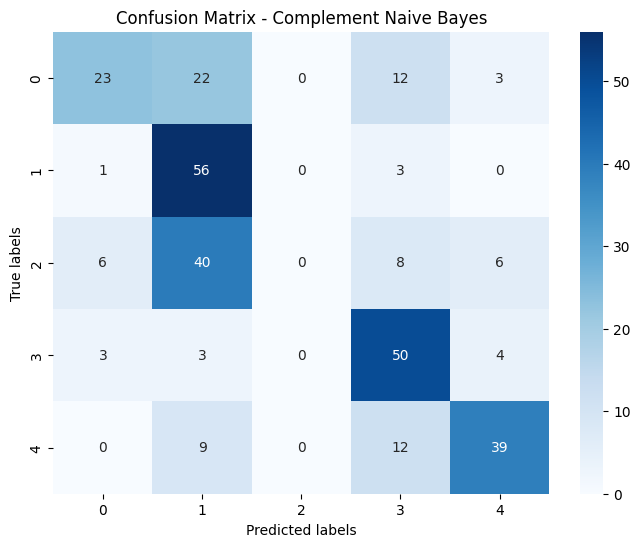

Training Gaussian Naive Bayes...
Performance metrics for Gaussian Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        60
           1       0.50      0.37      0.42        60
           2       0.42      0.45      0.43        60
           3       0.51      0.45      0.48        60
           4       0.49      0.63      0.55        60

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.46      0.46      0.46       300

Accuracy: 0.46
Sensitivity: 0.45999999999999996
Precision: 0.4623996129656507
F1 Score: 0.4567355333905545



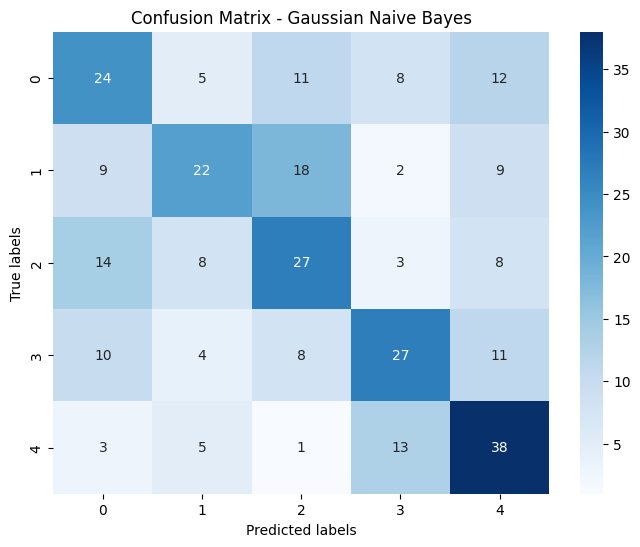

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing import image
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'


# Image dimensions
img_width, img_height = 224, 224  # MobileNet input size
batch_size = 32
num_epochs = 20

# Load model for feature extraction
model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)  # Preprocess input according to the model requirements
    features = model.predict(img_data)
    return features

# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

# Evaluate on test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# Scale the input features to the range [0, 1]
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Ensure non-negative values
min_value = np.min(np.concatenate([x_train_scaled, x_test_scaled]))
x_train_scaled_non_negative = x_train_scaled - min_value
x_test_scaled_non_negative = x_test_scaled - min_value

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train classifiers
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative, y_train)
    # Predict on test set
    y_pred = clf.predict(x_test_scaled_non_negative)
    # Print performance metrics
    print(f'Performance metrics for {clf_name}:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}\n')
    # Plot confusion matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
